# Problématique :  

## Pour le compte de Vinted, créer un outil permettant de déterminer les "bonnes affaires'* en ce qui concerne la vente de chaussures pour l'année 2021

# 

*'Les bonnes affaires' sont définies comme les chaussures qui ont un prix de vente inférieur au prix estimé par notre outil de prédiction, on suppose donc que les vendeurs ont fixé un prix inférieur à la valeur réelle de la chaussure.

# 

# 

# 

## Méthodologie : 

Nous avons tout d'abord récupéré toutes les données concernant les chaussures mises en vente sur Vinted (environ 3000 articles après nettoyage). Ce web-scrapping étant effectué en date du 28 décembre 2020, toutes ces données concerneront les chaussures mises en vente avant cette date.

Nous avons dans un premier temps fait le nettoyage de la base de données.Puis dans une seconde partie nous avons fait une petite analyse descriptive pour avoir un aperçu de la relation entre le prix de vente et les autres variables.

Puis dans une troisième partie nous avons utilisé des méthodes de machine learning dans le but de déterminer le modèle qui prédit le mieux le prix. 

Enfin, en date du 20 janvier 2021 nous avons refait un scrapping afin de récupérer les données concernant les chaussures mises en vente en 2021 seulement (environ 300 articles après nettoyage) puis nous avons appliqué notre meilleur modèle de prédiction sur ces données afin de déterminer lesdites "bonnes affaires".
# 

### Librairies

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep, time 
from selenium.common.exceptions import StaleElementReferenceException
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns 
import sympy as sp

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.linear_model import SGDClassifier

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn import model_selection as ms



# 

## Partie 1 : Scrapping 

Le code nous ayant permis de crée la base de donnés figure dans le Notebook intitulé "Scrapping_python".

La base de données brut ainsi créer à été sauvegarder dans un fichier csv intitulé 'Data_1_Vinted.csv'.

# 

## Partie 2 : Néttoyage et transformations

Nous allons dans un premier temps étudier les données manquantes.


In [2]:
data = pd.read_csv('Data_1_Vinted.csv')

### Données manquantes

In [3]:
data.head(3)

,Unnamed: 0,Marque,Taille,État,Couleur,Emplacement,Modepaiement,Nombre de vus,interet,ajout,genre,prix
0,0,ALEXANDER MCQUEEN,38,NEUF AVEC ÉTIQUETTE,"ROUGE, BLANC","GIGNAC-LA-NERTHE, FRANCE","CARTE BANCAIRE, PAYPAL",1.0,1 UTILISATEUR,IL Y A 42 MINUTES,Femmes,"350,00 €"
1,1,MELLOW YELLOW,38,NEUF SANS ÉTIQUETTE,"DORÉ, BORDEAUX","PLÉBOULLE, FRANCE","CARTE BANCAIRE, PAYPAL",1.0,1 UTILISATEUR,IL Y A 7 MINUTES,Femmes,"51,00 €"
2,2,NIKE,38.5,NEUF AVEC ÉTIQUETTE,ROSE,"AVIGNON, FRANCE","CARTE BANCAIRE, PAYPAL",1.0,1 UTILISATEUR,IL Y A 7 MINUTES,Femmes,"36,00 €"


In [4]:
data.pop("Unnamed: 0")
data = data.rename(columns = {'Nombre de vus': 'Vus','interet':'likes'})

<AxesSubplot:>

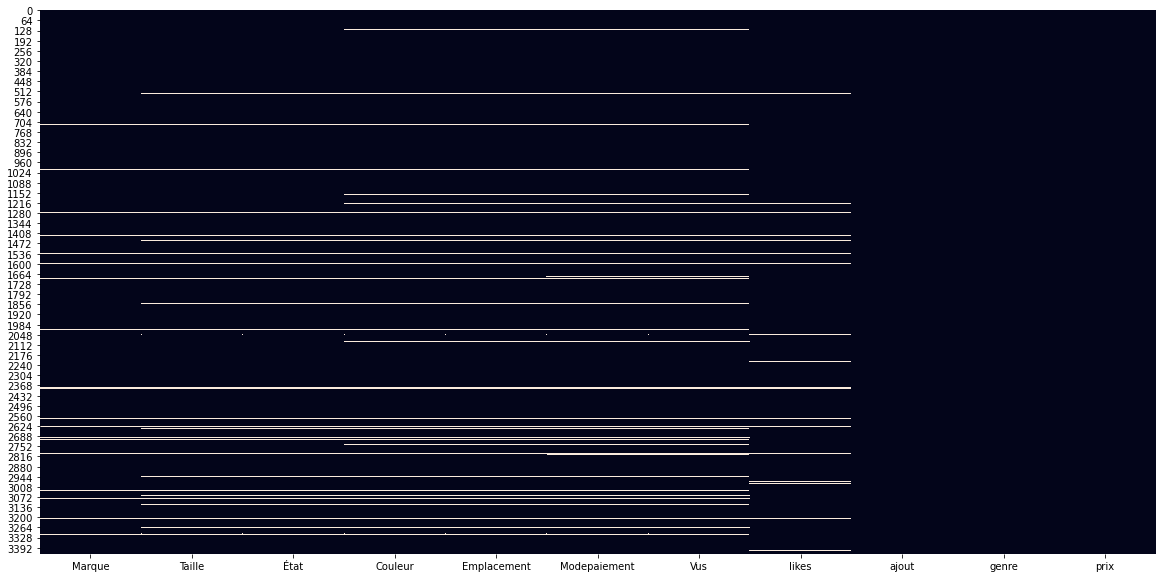

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False)

La base de données contient de nombreuses données manquantes.

À cause de la nature des données à étudier et du fait que les variables "likes" et "Vus" peuvent ne pas avoir de valeurs en raison du fait que, pour la première, il est possible que certains article n'ait aucun like et pour la seconde, que certains article n'est simplement pas de Vu.Aussi, la variable "Modepaiement" qui concerne le mode de paiement peut être négligé en raison du fait que les paiements se font forcément par carte bancaire.

Pour ces raisons, on va simplement remplacer les valeurs manquantes dans ces trois variables. 

In [6]:
data.likes=data.likes.replace(np.nan,0)
data.Vus=data.Vus.replace(np.nan,0)
data.Modepaiement=data.Vus.replace(np.nan,"Carte Bancaire")

#### Premire étape : supprimer les articles qui bien qu'ayant toutes les caractériqtiques des chaussures, n'en sont pas, et ce en utilisant la variable taille

Les tailles de chaussures sont des valeurs numériques, on transforme donc la taille en float et on affiche toutes les valeurs qui ne peuvent etre transformés et qui correspondent donc à des articles qui ne sont pas des chaussures

In [7]:
liste=[]
for i in range(len(data.Taille)):
    try:
        t=float(data.Taille.iloc[i])
    except:
        t=data.Taille.iloc[i]
    liste.append(t)

liste
data.Taille=liste

Liste=[]
for i in range(len(data.Taille)):
    if isinstance(data.Taille.iloc[i], (int, float))==False:
        carac=i
        Liste.append(carac)
        

Liste

# On rassemble tous ces articles dans un data et on en affiche les premières valeurs

df=data.iloc[Liste]
df.head(3)

,Marque,Taille,État,Couleur,Emplacement,Modepaiement,Vus,likes,ajout,genre,prix
9,ADIDAS,S / 36 / 8,NEUF SANS ÉTIQUETTE,"NOIR, BLANC","MADRID, ESPAÑA",216.0,216.0,22 UTILISATEURS,IL Y A 4 MOIS,Femmes,"14,00 €"
11,ADIDAS,M / 38 / 10,NEUF SANS ÉTIQUETTE,"NOIR, GRIS","MADRID, ESPAÑA",142.0,142.0,19 UTILISATEURS,IL Y A 2 MOIS,Femmes,"25,00 €"
37,NIKKIE,S / 36 / 8,TRÈS BON ÉTAT,"BLEU, BLANC","ROERMOND, NEDERLAND",1.0,1.0,5 UTILISATEURS,IL Y A UN JOUR,Femmes,"17,49 €"


On supprime tous ces articles de la base de données

In [8]:
data.drop(data.index[Liste], inplace=True)

#### Deuxieme étape : supprimer les articles qui ne sont pas des chaussures car elles n'en ont pas les caristéristiques

In [9]:
dmliste=[]
for i in range(len(data)):
    if data.iloc[i].isnull().sum()> 0 :
        dm=i
        dmliste.append(dm)

In [10]:
# On rasssemble tous ces articles dans un data et on affiche les premières valeurs 

dmdata=data.iloc[dmliste]
dmdata.head(3)

,Marque,Taille,État,Couleur,Emplacement,Modepaiement,Vus,likes,ajout,genre,prix
10,HANDMADE,NaN,NaN,NaN,NaN,0.0,0.0,22 UTILISATEURS,IL Y A 5 MOIS,Femmes,"13,00 €"
95,YVES SAINT LAURENT,NaN,NaN,NaN,NaN,0.0,0.0,1 UTILISATEUR,IL Y A UN MOIS,Femmes,"920,00 €"
126,IKEA,NaN,NaN,NaN,NaN,0.0,0.0,2 UTILISATEURS,IL Y A UN AN,Femmes,"2,00 €"


On verifie grace à la taille qu'il n'y a aucune chaussures dans ce data

In [11]:
set(dmdata.Taille)

{nan}

On supprime tous ces articles de la base de données

In [12]:
data.drop(data.index[dmliste], inplace=True)

#### Vérification

In [13]:
data.isna().count()

Marque          2830
Taille          2830
État            2830
Couleur         2830
Emplacement     2830
Modepaiement    2830
Vus             2830
likes           2830
ajout           2830
genre           2830
prix            2830
dtype: int64

En supprimant tous les articles qui ne sont pas des chaussures, on se rend compte qu'il n'y a plus aucune données manquantes

### Fonction : néttoyage et transformation 

Nous avons créer une fonction dans une librairie qui opère toutes les transformation nécessaire sur notre base de données. 

Les détails et les raisons de ces transformation y figurent.

In [14]:
data = pd.read_csv('Data_1_Vinted.csv')

In [15]:
import datapropre as dp

In [16]:
data = dp.nettoyage(data)

/Users/fried/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


La base de données ainsi transformée devient :

In [17]:
data

,Marque,État,Vus,likes,genre,Prix,couleur,pays,TAILLE
0,ALEXANDER MCQUEEN,NEUF AVEC ÉTIQUETTE,1.0,1,Femmes,350,ROUGE,FRANCE,38
1,MELLOW YELLOW,NEUF SANS ÉTIQUETTE,1.0,1,Femmes,51,DORÉ,FRANCE,38
2,NIKE,NEUF AVEC ÉTIQUETTE,1.0,1,Femmes,36,ROSE,FRANCE,38.5
3,NIKE,NEUF AVEC ÉTIQUETTE,7.0,1,Femmes,79,NOIR,FRANCE,39
4,THE KOOPLES,TRÈS BON ÉTAT,1.0,1,Femmes,65,NOIR,FRANCE,37
...,...,...,...,...,...,...,...,...,...
3426,DSQUARED2,BON ÉTAT,172.0,2,Femmes,110,BLANC,FRANCE,37
3427,KICKERS,TRÈS BON ÉTAT,365.0,4,Femmes,60,NOIR,FRANCE,38
3428,KICKERS,TRÈS BON ÉTAT,71.0,4,Femmes,58,ROSE,FRANCE,37.5
3429,KICKERS,BON ÉTAT,1229.0,5,Femmes,50,GRIS,FRANCE,39


# Analyse descriptive

#### Formatage des variables 

In [18]:
data.likes=pd.to_numeric(data['likes'])
data.Prix=pd.to_numeric(data['Prix'])
data.Vus=pd.to_numeric(data['Vus'])
data.Marque=data.Marque.astype("category")
data.TAILLE=data.TAILLE.astype("category")
data.État=data.État.astype("category")
data.couleur=data.couleur.astype("category")
data.pays=data.pays.astype("category")
data.genre=data.genre.astype("category")

#### Variables quantitative : Vus et likes

<AxesSubplot:xlabel='Prix', ylabel='Vus'>

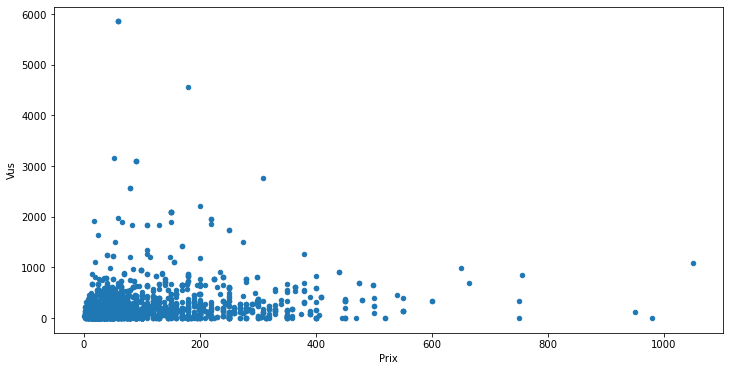

In [19]:
data.plot.scatter("Prix","Vus",figsize = (12, 6))

Les articles les plus chers sont les moins consultés.

<AxesSubplot:xlabel='Prix', ylabel='likes'>

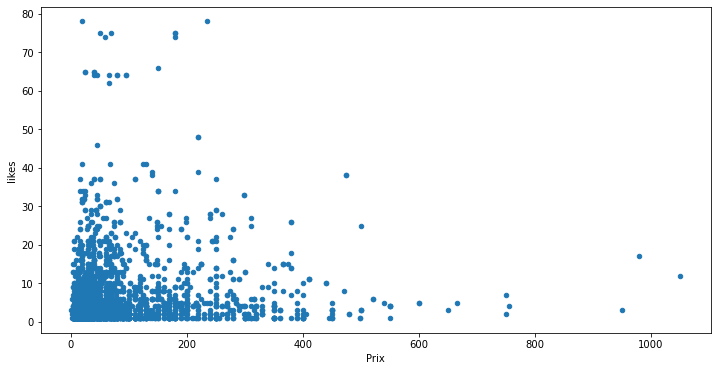

In [20]:
data.plot.scatter("Prix","likes",figsize = (12, 6))

La distribution semble aléatoire mais on aurait tendance à penser que les articles les plus cher ont moins de like

#### Variables qualitatives

<AxesSubplot:xlabel='État', ylabel='Prix'>

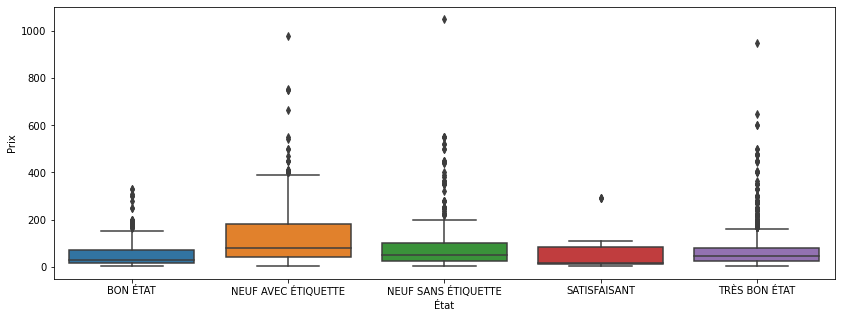

In [21]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="État", y="Prix", data=data)

<AxesSubplot:xlabel='pays', ylabel='Prix'>

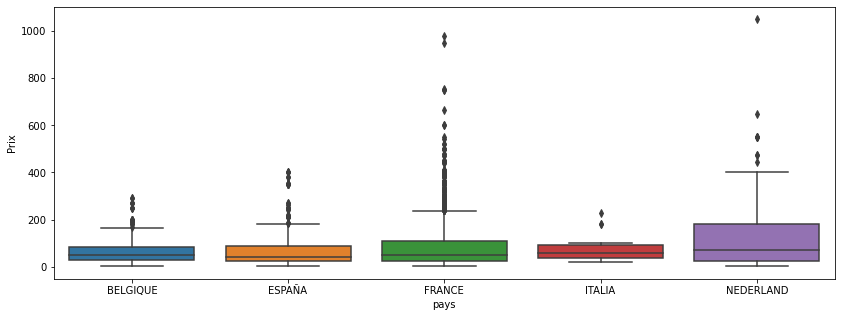

In [22]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="pays", y="Prix", data=data)

Les Néerlandais semblent fixés un prix de vente plus élevés que les autres, en moyenne.

<AxesSubplot:xlabel='genre', ylabel='Prix'>

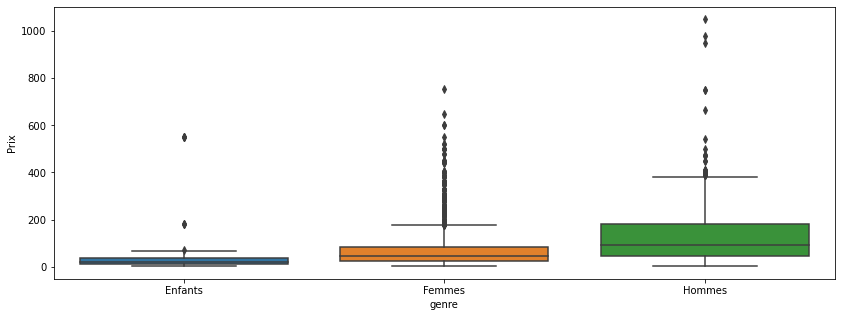

In [23]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="genre", y="Prix", data=data)

Les articles pour hommes semblent avoir un prix fixé plus élevé que ceux des femmes et des enfants.

<AxesSubplot:xlabel='TAILLE', ylabel='Prix'>

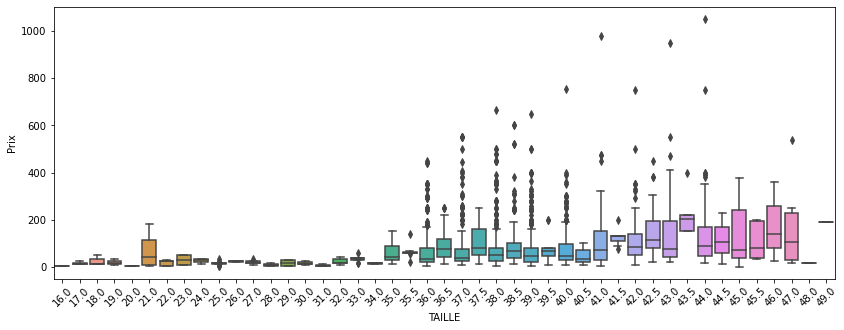

In [24]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
sns.boxplot(x="TAILLE", y="Prix", data=data)

La distribution du prix fixé semble etre croissante avec l'augmentation de la pointure mais décroit à partir du 44

<AxesSubplot:xlabel='couleur', ylabel='Prix'>

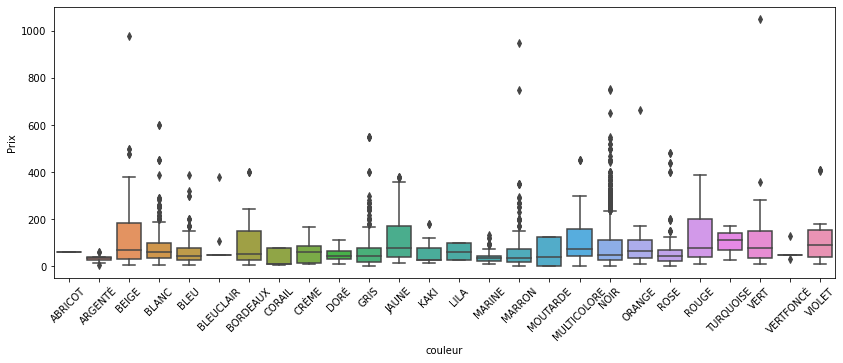

In [25]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
sns.boxplot(x="couleur", y="Prix", data=data)

## Partie 3 : Machine learning


#### Pipeline

In [26]:
df=data[['Marque','TAILLE','État','couleur','pays','genre',"Prix","Vus","likes"]]

y = df['Prix']
X= df.drop('Prix', axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y)

quali = ['Marque','État','TAILLE','couleur','pays','genre']
quanti =['Vus','likes'] 

qualitrans=Pipeline(steps=[('imputer',OneHotEncoder(handle_unknown="ignore"))])
quantitrans= Pipeline(steps=[('norm',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[('cat',qualitrans,quali),
                                              ('num',quantitrans,quanti)])


#### Listes des modèles

In [27]:
import listesmodeles as liste

In [28]:
modeles = liste.modelist()

[LinearRegression(),
 Lasso(alpha=0.001),
 Lasso(alpha=0.01),
 Lasso(alpha=0.1),
 Lasso(alpha=1),
 Ridge(alpha=0.001),
 Ridge(alpha=0.01),
 Ridge(alpha=0.1),
 Ridge(alpha=1),
 ElasticNet(alpha=0.001, l1_ratio=0.25),
 ElasticNet(alpha=0.001),
 ElasticNet(alpha=0.001, l1_ratio=0.75),
 ElasticNet(alpha=0.01, l1_ratio=0.25),
 ElasticNet(alpha=0.01),
 ElasticNet(alpha=0.01, l1_ratio=0.75),
 ElasticNet(alpha=0.1, l1_ratio=0.25),
 ElasticNet(alpha=0.1),
 ElasticNet(alpha=0.1, l1_ratio=0.75),
 ElasticNet(alpha=1, l1_ratio=0.25),
 ElasticNet(alpha=1),
 ElasticNet(alpha=1, l1_ratio=0.75),
 KNeighborsRegressor(n_neighbors=3),
 KNeighborsRegressor(n_neighbors=4),
 KNeighborsRegressor(),
 KNeighborsRegressor(n_neighbors=6),
 KNeighborsRegressor(n_neighbors=7),
 KNeighborsRegressor(n_neighbors=8),
 KNeighborsRegressor(n_neighbors=9),
 SVR(C=0.001, epsilon=0.001),
 SVR(C=0.01, epsilon=0.001),
 SVR(C=0.1, epsilon=0.001),
 SVR(C=1, epsilon=0.001),
 SVR(C=10, epsilon=0.001),
 SVR(C=100, epsilon=0.001),


#### Liste des Classificateurs en fonction des modèles

In [29]:
i=0
Classificateur=[]
for i in range(len(modeles)):
    liste= Pipeline(steps=[("processor",transformer),
                        ("classi",modeles[i])])
    Classificateur.append(liste) 
    i=i+1


[Pipeline(steps=[('processor',
                  ColumnTransformer(transformers=[('cat',
                                                   Pipeline(steps=[('imputer',
                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                   ['Marque', 'État', 'TAILLE',
                                                    'couleur', 'pays',
                                                    'genre']),
                                                  ('num',
                                                   Pipeline(steps=[('norm',
                                                                    MinMaxScaler())]),
                                                   ['Vus', 'likes'])])),
                 ('classi', LinearRegression())]),
 Pipeline(steps=[('processor',
                  ColumnTransformer(transformers=[('cat',
                                                   Pipeline(steps=[('impu

#### Application : résultats des modèles 

In [30]:

i=0
resultats=[]
for i in range(len(Classificateur)):
    cr=cross_val_score(Classificateur[i],X_train,y_train,cv=10)
    resultats.append(cr)
    i=i+1

/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919065.3406644003, tolerance: 1894.92540715413
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653952.1650161217, tolerance: 1936.8374880589165
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 691300.5763723599, tolerance: 1833.0043305628622
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/fried/opt/anaconda3/lib/python3.8/site-packa

/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fried/opt/anacond

#### Dictionnaire contenant les resultats des modèles sur les données d'apprentissage

In [31]:
Dico={}
i=0
for i in range(len(resultats)):
    Dico[modeles[i]]=[resultats[i].mean(),resultats[i].std()]
    i=i+1

In [32]:
for key, value in (sorted(Dico.items(), key=lambda x: x[1],reverse=True)) :
    print(f'{repr(key):50} : {value}')

RandomForestRegressor()                            : [0.6551992141974485, 0.07133677440578676]
RandomForestRegressor(n_estimators=200)            : [0.65416856131105, 0.07944994430564757]
RandomForestRegressor(n_estimators=150)            : [0.6536705045754433, 0.07752347557580526]
RandomForestRegressor(n_estimators=50)             : [0.6502623407823346, 0.07368771763431699]
SVR(C=1000, epsilon=1)                             : [0.6411980512665214, 0.08522511303642537]
SVR(C=1000)                                        : [0.6409714014708944, 0.08543350541380512]
SVR(C=1000, epsilon=0.01)                          : [0.6408868398523521, 0.08546166749316077]
SVR(C=1000, epsilon=0.001)                         : [0.6408732994412952, 0.08546390277740339]
MLPRegressor(hidden_layer_sizes=(25, 50, 25))      : [0.5333122686528461, 0.0933067258432858]
MLPRegressor(hidden_layer_sizes=(50, 50))          : [0.521529661591016, 0.06952255059711393]
ElasticNet(alpha=0.001, l1_ratio=0.75)             : [

# Scores

In [33]:
modfit=[]
for i in range(len(Classificateur)):
    L = Classificateur[i].fit(X_train, y_train)
    modfit.append(L)

/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1232239.3415393583, tolerance: 2110.205468622811
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55562.08176033292, tolerance: 2110.205468622811
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fried/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWar

In [34]:
Dicoscoreentrainement={}
i=0
for i in range(len(modeles)):
    Dicoscoreentrainement[modeles[i]]=[modfit[i].score(X_train, y_train)]
    i=i+1

In [35]:
for key, value in (sorted(Dicoscoreentrainement.items(), key=lambda x: x[1],reverse=True)) :
    print(f'{repr(key):50} : {value}')

RandomForestRegressor(n_estimators=50)             : [0.9578484593552204]
RandomForestRegressor()                            : [0.9570097308066234]
RandomForestRegressor(n_estimators=150)            : [0.9569466112082115]
RandomForestRegressor(n_estimators=200)            : [0.9552574212561356]
SVR(C=1000, epsilon=1)                             : [0.8925832792247069]
SVR(C=1000)                                        : [0.8921673299376107]
SVR(C=1000, epsilon=0.01)                          : [0.8921189505817824]
SVR(C=1000, epsilon=0.001)                         : [0.8921123003382709]
MLPRegressor(hidden_layer_sizes=(50, 50))          : [0.81608051315355]
MLPRegressor(hidden_layer_sizes=(25, 50, 25))      : [0.8031481679323873]
KNeighborsRegressor(n_neighbors=3)                 : [0.7495524608740682]
KNeighborsRegressor(n_neighbors=4)                 : [0.640519898995868]
LinearRegression()                                 : [0.6371522162457534]
Ridge(alpha=0.001)                       

Les meilleurs modèles sont : RandomForestRegressor et SVR.

À ce stade, on garde ces deux modèles et on verifie si il y'a ou non surapprentissage.

## Vérification : problèmes de surapprentaissage

#### Score des 2 meilleurs modèles sur l'échantillon test

On crée une liste contenant les meilleurs modèles et leurs paramètres

In [36]:
modelesmeilleeurs=[modeles[56],modeles[57],modeles[58],modeles[59],modeles[34],modeles[41],modeles[48],modeles[55]]
modfitmeilleurs=[]
modfitmeilleurs.append ( Classificateur[56].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[57].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[58].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[59].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[34].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[41].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[48].fit(X_train, y_train))
modfitmeilleurs.append (Classificateur[55].fit(X_train, y_train))

In [37]:
Dicoscoretest={}
i=0
for i in range(len(modelesmeilleeurs)):
    Dicoscoretest[modelesmeilleeurs[i]]=[modfitmeilleurs[i].score(X_test, y_test)]
    i=i+1

In [38]:
for key, value in (sorted(Dicoscoretest.items(), key=lambda x: x[1],reverse=True)) :
    print(f'{repr(key):50} : {value}')

SVR(C=1000)                                        : [0.5432844123694878]
SVR(C=1000, epsilon=1)                             : [0.5431985678654853]
SVR(C=1000, epsilon=0.01)                          : [0.543191667311126]
SVR(C=1000, epsilon=0.001)                         : [0.5431770437718162]
RandomForestRegressor(n_estimators=150)            : [0.5250469114954452]
RandomForestRegressor(n_estimators=200)            : [0.5195152939222218]
RandomForestRegressor(n_estimators=50)             : [0.5168703883040682]
RandomForestRegressor()                            : [0.5168211759228898]


### Learning curves

In [39]:
import fonctionsapp as fcaa

#### Random Forest

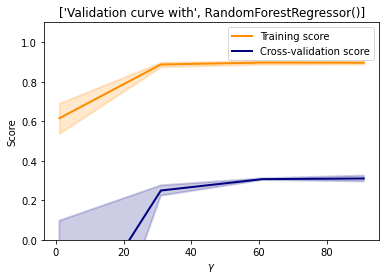

In [40]:
fcaa.curve(modeles[57],Classificateur[57],X_test, y_test,"classi__n_estimators",range(1,100,30))

#### SVM

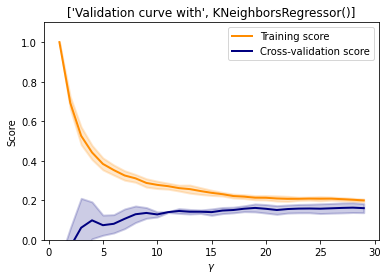

In [41]:
fcaa.curve(modeles[23],Classificateur[23],X_test, y_test,"classi__n_neighbors",range(1,30))


Il n'y a pas de problèmes flagrant de surraprentissage.

Le meilleur modèle est donc le RandomForest, cependant les paramètres optimaux de ce modèle sont d'environs 30 arbres.

# Modèle final avec les bons paramêtres

In [42]:
modelefinal =RandomForestRegressor(n_estimators=30)

Classificateurfinal=Pipeline(steps=[("processor",transformer),
                        ("classi",modelefinal)])

    
resultatsfinal=cross_val_score(Classificateurfinal,X_train,y_train,cv=10)
Dicobest={}
Dicobest[modelefinal]=[resultatsfinal.mean(),resultatsfinal.std()]
for key, value in (sorted(Dicobest.items(), key=lambda x: x[1],reverse=True)) :
    print(f'{repr(key):50} : {value}')
    
modfitfinal=Classificateurfinal.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)             : [0.6425224998771204, 0.08123943652201747]


# Partie 4 : Création de l'outil de prédiction 

### Data avec les articles de 2021 :

Le 18 janvier 2021 on refait un scrapping sur les 30 premières pages de vinted.fr afin de récuperer les données concernant les chaussures mises en vente en 2021.

Cette base de données brut ainsi récupéré à été enregistrer dans un fichier csv appeler "Data_2021.csv"

In [43]:
Dataessaie= pd.read_csv("Data_2021.csv")

On utilise la fonction nettoyage data afin de néttoyer ces données bruts

In [44]:
data2021 = dp.nettoyage(Dataessaie)

On importe les fonctions pour la prédiction finale

In [45]:
import predictionfonctionsfinal as predicteur

La fonction predicteur.outil crée un data.frame avec plusieurs colonnes : 
- La première "predicted": utilise le meilleur modèle que nous avons préalablement déterminer afin de prédire le prix de vente de l'article.
- La seconde "true"  montre le prix réellement fixé
- La troisième colonne "difference" calcule la différence entre la valeur prédite et la valeur réelle. 
- Enfin, la dernière colonne "plusvalue" calcule le rapport en pourcentage entre la valeur prédite et la valeur réelle. 

plusvalue = ((predicted/true) x 100)-100

In [46]:
pred=predicteur.outil(data2021,modfitfinal)
pred.head(4)

,predicted,true,difference,plusvalue
0,28.666667,8,20.666667,258
1,25.195238,5,20.195238,404
2,12.433333,3,9.433333,314
3,52.700000,70,-17.300000,-25


Explictaion : 
La plus value de la première ligne est égale à 298. Ce qui signifie que le prix fixée est 298% plus petit que la valeur prédite. 

On rajoute la colone plusvalue à notre data2021

In [47]:
data2021['plusvalue']=pred.plusvalue

Enfin, on applique la fonction style dataplusvaluepredicted afin de coloré en vert les très bonne affaires, en jaune les bonnes affaires et en rouge les mauvaises affaires le data 2021 qui rappellons le, renseigne sur les chaussures mises en vente en 2021. 

Définitions : 
- Très bonne affaire : on définit les très bonnes affaires comme les articles dont le prix de vente est inferieur à la valeur prédite. La valeur de la plus value correspond à l'économie que l'on réalise à l'achat à ce prix, par rapport à l'achat si le prix était égal à la valeur prédite. En raison de la grande variabilité des prix, des erreurs eventuelles du modèle et du fait que le choix du prix n'est pas forcément rationnelle, les très bonnes affaires sont celle dont la plus value est superieur à 75%. Cest un parti pris visant à améliorer l'outil.

- Bonne affaire : on définit les bonnes affaires comme les articles dont le prix de vente est inferieur à la valeur prédite mais dont la plus value bien que positive est inferieur à 75% et ce, pour les raisons évoquées précédemment.

- Mauvaise affaire : on définit les mauvaises affaires comme celles dont le prix de vente réel est superieur au prix prédit par le modèle.

In [48]:
data2021.style.apply(predicteur.dataplusvaluepredicted, axis=1)

,Marque,État,Vus,likes,genre,Prix,couleur,pays,TAILLE,plusvalue
0,SHOEBY,TRÈS BON ÉTAT,1.000000,1,Femmes,8,NOIR,NEDERLAND,39.000000,258
1,AMERICAN EAGLE,TRÈS BON ÉTAT,1.000000,1,Femmes,5,MARINE,FRANCE,43.000000,404
2,LULU CASTAGNETTE,BON ÉTAT,1.000000,1,Enfants,3,GRIS,FRANCE,20.000000,314
3,AIR FORCE,TRÈS BON ÉTAT,1.000000,1,Femmes,70,ROSE,ITALIA,39.000000,-25
4,ANNA FIELD,NEUF SANS ÉTIQUETTE,1.000000,1,Femmes,10,NOIR,ITALIA,39.000000,381
5,TEX KIDS,BON ÉTAT,1.000000,1,Enfants,5,TURQUOISE,FRANCE,36.000000,156
6,VERTBAUDET,NEUF SANS ÉTIQUETTE,1.000000,1,Enfants,10,NOIR,FRANCE,30.000000,60
7,KICKERS,SATISFAISANT,1.000000,1,Enfants,3,MARINE,FRANCE,24.000000,596
9,GUESS,NEUF SANS ÉTIQUETTE,354.000000,1,Femmes,50,GRIS,FRANCE,37.000000,-18
39,NIKE,TRÈS BON ÉTAT,1.000000,1,Femmes,40,NOIR,FRANCE,40.000000,40
